##### Importuojame bibliotekas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

##### Pirma dalis

In [6]:
df = pd.read_csv('sunspot.txt', delimiter = "\t", names=["years", "spots"])

In [7]:
df

,years,spots
0,1700,5
1,1701,11
2,1702,16
3,1703,23
4,1704,36
...,...,...
310,2010,16
311,2011,57
312,2012,58
313,2013,65


<function matplotlib.pyplot.show(close=None, block=None)>

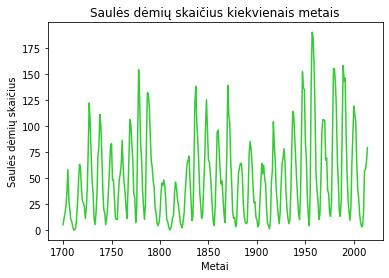

In [8]:
plt.plot(df["years"], df["spots"], c="limegreen")
plt.title('Saulės dėmių skaičius kiekvienais metais')
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.show

In [9]:
Spots_1 = df.drop('years', axis=1)

In [10]:
Spots_1

,spots
0,5
1,11
2,16
3,23
4,36
...,...
310,16
311,57
312,58
313,65


##### n = 2

In [11]:
spots_2 = Spots_1.drop([313,314])

In [12]:
for i in range(len(spots_2)):
    spots_2.loc[i,'spots2'] = Spots_1.loc[i+1,'spots']

##### Įvesties matrica

In [13]:
spots_2

,spots,spots2
0,5,11.0
1,11,16.0
2,16,23.0
3,23,36.0
4,36,58.0
...,...,...
308,3,4.0
309,4,16.0
310,16,57.0
311,57,58.0


In [14]:
spots_2.T

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
spots,5.0,11.0,16.0,23.0,36.0,58.0,29.0,20.0,10.0,8.0,...,64.0,40.0,30.0,15.0,7.0,3.0,4.0,16.0,57.0,58.0
spots2,11.0,16.0,23.0,36.0,58.0,29.0,20.0,10.0,8.0,3.0,...,40.0,30.0,15.0,7.0,3.0,4.0,16.0,57.0,58.0,65.0


In [15]:
spots_2out = Spots_1.drop([0,1])
spots_2out.reset_index(drop=True, inplace=True)

##### Išvesties vektorius

In [16]:
spots_2out.T

,0,1,2,3,4,5,6,7,8,9,...,303,304,305,306,307,308,309,310,311,312
spots,16,23,36,58,29,20,10,8,3,0,...,30,15,7,3,4,16,57,58,65,79


<function matplotlib.pyplot.show(close=None, block=None)>

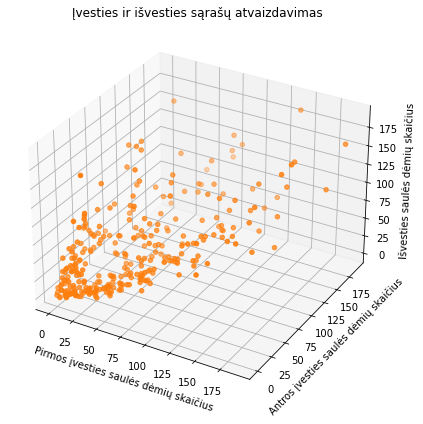

In [17]:
fig3 = plt.figure(figsize = (8,7))

ax3 = plt.axes(projection='3d')

ax3.set_title("Įvesties ir išvesties sąrašų atvaizdavimas")    
ax3.set_xlabel('Pirmos įvesties saulės dėmių skaičius')
ax3.set_ylabel('Antros įvesties saulės dėmių skaičius')
ax3.set_zlabel('Išvesties saulės dėmių skaičius')

ax3.scatter3D(spots_2["spots"], spots_2["spots2"], spots_2out["spots"], c='tab:orange')
plt.show

In [18]:
spots_2train = np.array(spots_2.head(200))
spots_2trainout = np.array(spots_2out.head(200)).flatten()
spots_2test = np.array(spots_2.tail(113))
spots_2testout= np.array(spots_2out.tail(113)).flatten()

In [19]:
model = LinearRegression().fit(spots_2train, spots_2trainout)

In [20]:
r_sq = model.score(spots_2train, spots_2trainout)
print('coefficient of determination:', r_sq)
print('intercept (b):', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8197788401382848
intercept (b): 13.403683236718116
slope: [-0.67608198  1.37150939]


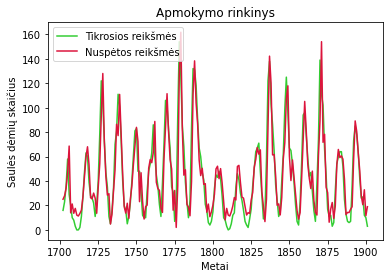

In [21]:
spots_2trainout_pred = model.predict(spots_2train)
plt.plot(np.arange(1702,1902),spots_2trainout, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1702,1902),spots_2trainout_pred, label = "Nuspėtos reikšmės", c='crimson')
plt.title("Apmokymo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

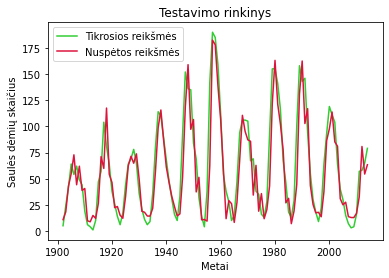

In [22]:
spots_2testout_pred = model.predict(spots_2test)
plt.plot(np.arange(1902,2015),spots_2testout, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1902,2015),spots_2testout_pred, label = "Nuspėtos reikšmės", c='crimson')
plt.title("Testavimo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

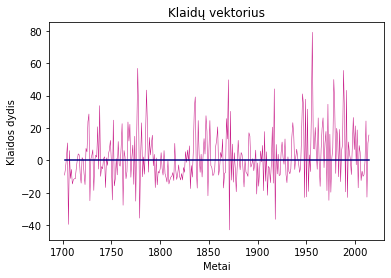

In [23]:
e_2 = np.concatenate((spots_2trainout,spots_2testout))-np.concatenate((spots_2trainout_pred,spots_2testout_pred))
plt.plot(np.arange(1702,2015), e_2, c='mediumvioletred', lw=0.5)
plt.plot([1702, 2014], np.zeros(2), c='navy')
plt.title("Klaidų vektorius")
plt.xlabel("Metai")
plt.ylabel("Klaidos dydis")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

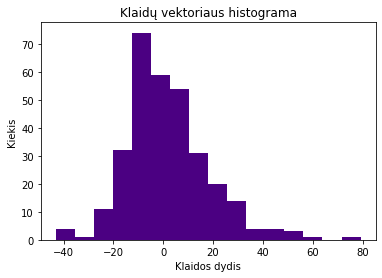

In [24]:
plt.hist(e_2,bins=16,color='indigo')
plt.title('Klaidų vektoriaus histograma')
plt.xlabel("Klaidos dydis")
plt.ylabel("Kiekis")
plt.show

In [25]:
np.sum(np.square(e_2))/len(e_2)

278.26865758028515

In [26]:
np.median(np.abs(e_2))

9.218889655548992

In [27]:
class AdaptiveLinearNeuron(object):
   def __init__(self, rate = 0.01, niter = 10):
      self.rate = rate
      self.niter = niter

   def fit(self, X, y):
      """Fit training data
      X : Training vectors, X.shape : [#samples, #features]
      y : Target values, y.shape : [#samples]
      """

      # weights
      self.weight = np.zeros(1 + X.shape[1])

      # Number of misclassifications
      self.errors = []

      # Cost function
      self.cost = []

      for i in range(self.niter):
         output = self.net_input(X)
         errors = y - output
         self.weight[1:] += self.rate * X.T.dot(errors)
         self.weight[0] += self.rate * errors.sum()
         cost = (errors**2).sum() / X.shape[0]
         self.cost.append(cost)
      return self

   def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.weight[1:]) + self.weight[0]

In [28]:
X_2 = spots_2.iloc[0:200, [0, 1]].values
y_2 = spots_2out.iloc[0:200, 0].values
X_2test = spots_2.iloc[200:, [0, 1]].values
y_2test = spots_2out.iloc[200:, 0].values

<function matplotlib.pyplot.show(close=None, block=None)>

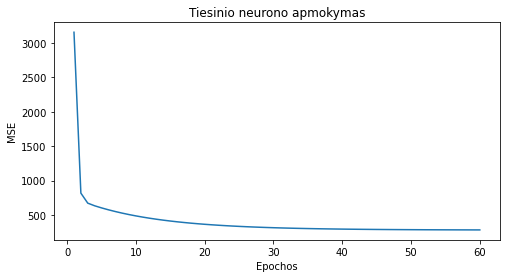

In [29]:
fig, ax = plt.subplots(figsize=(8, 4))
aln1 = AdaptiveLinearNeuron(0.000001, 60).fit(X_2,y_2)
ax.plot(range(1, len(aln1.cost) + 1), aln1.cost)
ax.set_xlabel('Epochos')
ax.set_ylabel('MSE')
ax.set_title('Tiesinio neurono apmokymas')
plt.show

In [30]:
aln1.weight

array([ 0.06413375, -0.51083752,  1.39982092])

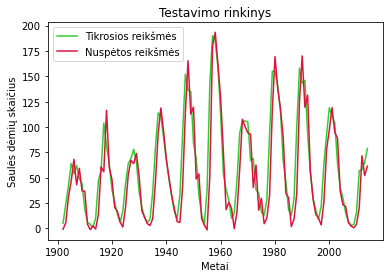

In [31]:
y_2test_pred = aln1.net_input(X_2test)
plt.plot(np.arange(1902,2015),y_2test, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1902,2015),y_2test_pred, label = "Nuspėtos reikšmės", c='crimson')
plt.title("Testavimo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

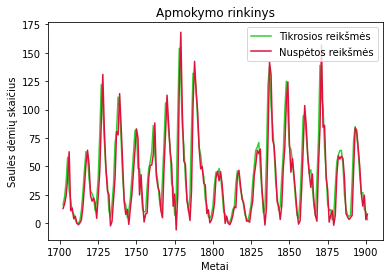

In [32]:
plt.plot(np.arange(1702,1902),y_2, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1702,1902),aln1.net_input(X_2), label = "Nuspėtos reikšmės", c='crimson')
plt.title("Apmokymo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

##### n = 6

In [33]:
spots_6 = Spots_1.drop([309,310,311,312,313,314])
for i in range(len(spots_6)):
    spots_6.loc[i,'spots2'] = Spots_1.loc[i+1,'spots']
    spots_6.loc[i,'spots3'] = Spots_1.loc[i+2,'spots']
    spots_6.loc[i,'spots4'] = Spots_1.loc[i+3,'spots']
    spots_6.loc[i,'spots5'] = Spots_1.loc[i+4,'spots']
    spots_6.loc[i,'spots6'] = Spots_1.loc[i+5,'spots']

In [34]:
spots_6out = Spots_1.drop([0,1,2,3,4,5])
spots_6out.reset_index(drop=True, inplace=True)

In [35]:
spots_6train = np.array(spots_6.head(200))
spots_6trainout = np.array(spots_6out.head(200)).flatten()
spots_6test = np.array(spots_6.tail(109))
spots_6testout = np.array(spots_6out.tail(109)).flatten()
model = LinearRegression().fit(spots_6train, spots_6trainout)
r_sq = model.score(spots_6train, spots_6trainout)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8254213353035943
intercept: 12.487115307483776
slope: [ 0.15341921 -0.23942144  0.12574875 -0.03091404 -0.64242115  1.35102406]


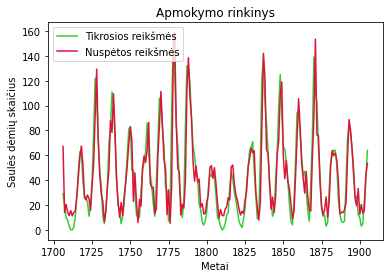

In [36]:
spots_6trainout_pred = model.predict(spots_6train)
plt.plot(np.arange(1706,1906),spots_6trainout, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1706,1906),spots_6trainout_pred, label = "Nuspėtos reikšmės", c='crimson')
plt.title("Apmokymo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

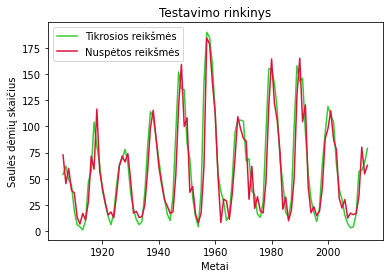

In [37]:
spots_6testout_pred = model.predict(spots_6test)
plt.plot(np.arange(1906,2015),spots_6testout, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1906,2015),spots_6testout_pred, label = "Nuspėtos reikšmės", c='crimson')
plt.title("Testavimo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

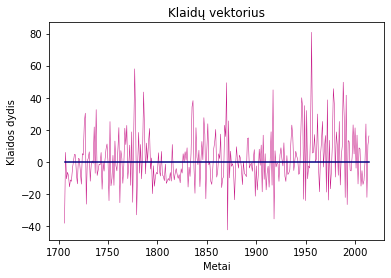

In [38]:
e_6 = np.concatenate((spots_6trainout,spots_6testout))-np.concatenate((spots_6trainout_pred,spots_6testout_pred))
plt.plot(np.arange(1706,2015), e_6, c='mediumvioletred', lw=0.5)
plt.plot([1706, 2014], np.zeros(2), c='navy')
plt.title("Klaidų vektorius")
plt.xlabel("Metai")
plt.ylabel("Klaidos dydis")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

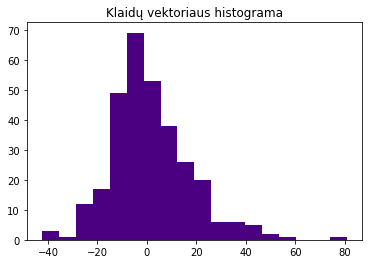

In [39]:
plt.hist(e_6,bins=18,color='indigo')
plt.title('Klaidų vektoriaus histograma')
plt.show

In [40]:
np.sum(np.square(e_6))/len(e_6)

271.0407045969269

In [41]:
np.median(np.abs(e_6))

8.955843546367664

In [42]:
X_6 = spots_6.iloc[0:200, [0, 1, 2, 3, 4, 5]].values
y_6 = spots_6out.iloc[0:200, 0].values
X_6test = spots_6.iloc[200:, [0, 1, 2, 3, 4, 5]].values
y_6test = spots_6out.iloc[200:, 0].values

<function matplotlib.pyplot.show(close=None, block=None)>

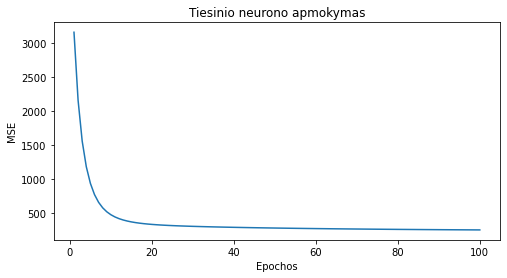

In [43]:
fig, ax = plt.subplots(figsize=(8, 4))
aln2 = AdaptiveLinearNeuron(0.0000006, 100).fit(X_6,y_6)
ax.plot(range(1, len(aln2.cost) + 1), aln2.cost)
ax.set_xlabel('Epochos')
ax.set_ylabel('MSE')
ax.set_title('Tiesinio neurono apmokymas')
plt.show

In [44]:
aln2.weight

array([ 0.0392712 ,  0.22418354, -0.07615967,  0.00951886, -0.21724571,
       -0.23596389,  1.24342034])

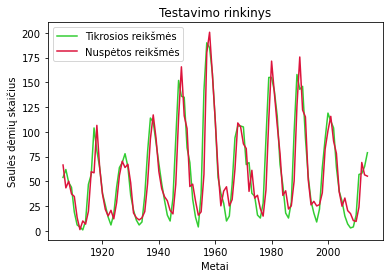

In [45]:
y_6test_pred = aln2.net_input(X_6test)
plt.plot(np.arange(1906,2015),y_6test, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1906,2015),y_6test_pred, label = "Nuspėtos reikšmės", c='crimson')
plt.title("Testavimo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

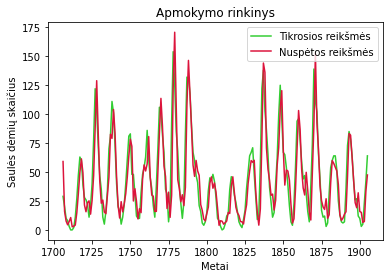

In [46]:
plt.plot(np.arange(1706,1906),y_6, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1706,1906),aln2.net_input(X_6), label = "Nuspėtos reikšmės", c='crimson')
plt.title("Apmokymo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

##### n = 10

In [47]:
spots_10 = Spots_1.drop([305,306,307,308,309,310,311,312,313,314])
for i in range(len(spots_10)):
    spots_10.loc[i,'spots2'] =  Spots_1.loc[i+1,'spots']
    spots_10.loc[i,'spots3'] =  Spots_1.loc[i+2,'spots']
    spots_10.loc[i,'spots4'] =  Spots_1.loc[i+3,'spots']
    spots_10.loc[i,'spots5'] =  Spots_1.loc[i+4,'spots']
    spots_10.loc[i,'spots6'] =  Spots_1.loc[i+5,'spots']
    spots_10.loc[i,'spots7'] =  Spots_1.loc[i+6,'spots']
    spots_10.loc[i,'spots8'] =  Spots_1.loc[i+7,'spots']
    spots_10.loc[i,'spots9'] =  Spots_1.loc[i+8,'spots']
    spots_10.loc[i,'spots10'] = Spots_1.loc[i+9,'spots']

In [48]:
spots_10out = Spots_1.drop([0,1,2,3,4,5,6,7,8,9])
spots_10out.reset_index(drop=True, inplace=True)

In [49]:
spots_10train = np.array(spots_10.head(200))
spots_10trainout = np.array(spots_10out.head(200)).flatten()
spots_10test = np.array(spots_10.tail(105))
spots_10testout = np.array(spots_10out.tail(105)).flatten()
model = LinearRegression().fit(spots_10train, spots_10trainout)
r_sq = model.score(spots_10train, spots_10trainout)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.8402037092409227
intercept: 8.11011652242965
slope: [ 0.01127462  0.11401852  0.03402009 -0.03176102  0.06298231 -0.15371419
  0.14257871 -0.05173529 -0.57435326  1.26827984]


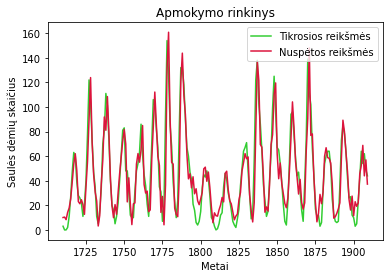

In [50]:
spots_10trainout_pred = model.predict(spots_10train)
plt.plot(np.arange(1710,1910),spots_10trainout, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1710,1910),spots_10trainout_pred, label = "Nuspėtos reikšmės", c='crimson')
plt.title("Apmokymo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

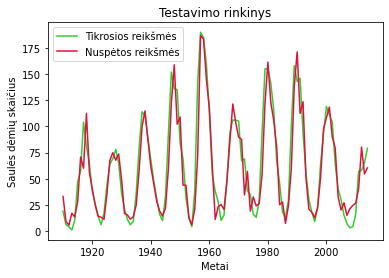

In [51]:
spots_10testout_pred = model.predict(spots_10test)
plt.plot(np.arange(1910,2015),spots_10testout, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1910,2015),spots_10testout_pred, label = "Nuspėtos reikšmės", c='crimson')
plt.title("Testavimo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

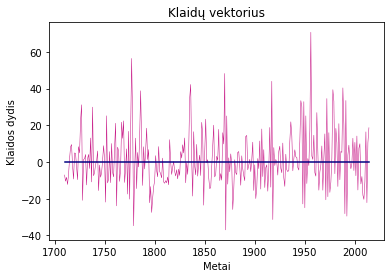

In [52]:
e_10 = np.concatenate((spots_10trainout,spots_10testout))-np.concatenate((spots_10trainout_pred,spots_10testout_pred))
plt.plot(np.arange(1710,2015), e_10, c='mediumvioletred', lw=0.5)
plt.plot([1710, 2014], np.zeros(2), c='navy')
plt.title("Klaidų vektorius")
plt.xlabel("Metai")
plt.ylabel("Klaidos dydis")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

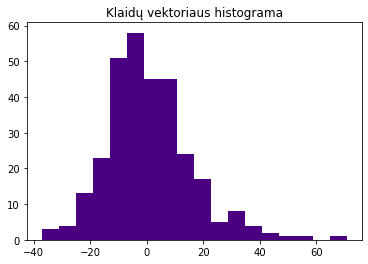

In [53]:
plt.hist(e_10,bins=18,color='indigo')
plt.title('Klaidų vektoriaus histograma')
plt.show

In [54]:
np.sum(np.square(e_10))/len(e_10)

232.26342820195603

In [63]:
np.median(np.abs(e_10))

8.608355711023776

In [56]:
X_10 = spots_10.iloc[0:200, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].values
y_10 = spots_10out.iloc[0:200, 0].values
X_10test = spots_10.iloc[200:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]].values
y_10test = spots_10out.iloc[200:, 0].values

<function matplotlib.pyplot.show(close=None, block=None)>

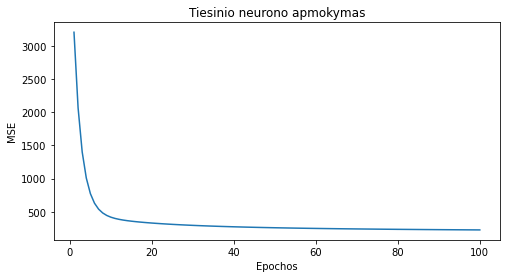

In [57]:
fig, ax = plt.subplots(figsize=(8, 4))
aln3 = AdaptiveLinearNeuron(0.0000004, 100).fit(X_10,y_10)
ax.plot(range(1, len(aln3.cost) + 1), aln3.cost)
ax.set_xlabel('Epochos')
ax.set_ylabel('MSE')
ax.set_title('Tiesinio neurono apmokymas')
plt.show

In [58]:
aln3.weight

array([ 0.0125193 ,  0.10189482,  0.09364153,  0.05028534,  0.01429586,
        0.02189151,  0.02376252, -0.01344267, -0.20614669, -0.07197295,
        0.96610203])

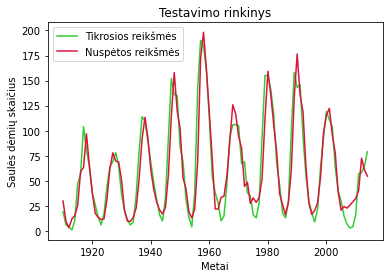

In [59]:
y_10test_pred = aln3.net_input(X_10test)
plt.plot(np.arange(1910,2015),y_10test, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1910,2015),y_10test_pred, label = "Nuspėtos reikšmės", c='crimson')
plt.title("Testavimo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

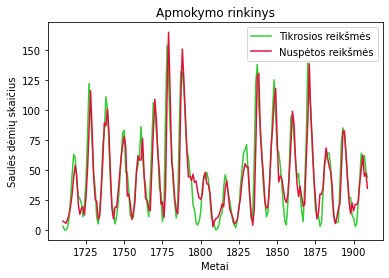

In [60]:
plt.plot(np.arange(1710,1910),y_10, label = "Tikrosios reikšmės", c='limegreen')
plt.plot(np.arange(1710,1910),aln3.net_input(X_10), label = "Nuspėtos reikšmės", c='crimson')
plt.title("Apmokymo rinkinys")
plt.xlabel("Metai")
plt.ylabel("Saulės dėmių skaičius")
plt.legend()
plt.show()

##### Antra dalis

##### Nuskaitome duomenų rinkinį ir suklasifikuojame rezultatus

In [104]:
df = pd.read_csv("StudentsPerformance.csv")
df["mathLvl"] = "low"
df.loc[df["math score"]>=25, 'mathLvl'] = "med"
df.loc[df["math score"]>=50, 'mathLvl'] = "high"
df.loc[df["math score"]>=75, 'mathLvl'] = "top"
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average score,mathLvl
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,high
1,female,group C,some college,standard,completed,69,90,88,82.33,high
2,female,group B,master's degree,standard,none,90,95,93,92.67,top
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,med
4,male,group C,some college,standard,none,76,78,75,76.33,top
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,top
996,male,group C,high school,free/reduced,none,62,55,55,57.33,high
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,high
998,female,group D,some college,standard,completed,68,78,77,74.33,high


In [105]:
dataset = df.values
dataset

array([['female', 'group B', "bachelor's degree", ..., 74, 72.67, 'high'],
       ['female', 'group C', 'some college', ..., 88, 82.33, 'high'],
       ['female', 'group B', "master's degree", ..., 93, 92.67, 'top'],
       ...,
       ['female', 'group C', 'high school', ..., 65, 65.0, 'high'],
       ['female', 'group D', 'some college', ..., 77, 74.33, 'high'],
       ['female', 'group D', 'some college', ..., 86, 83.0, 'top']],
      dtype=object)

In [106]:
X = dataset[:,[6,7]].astype(float)
Y = dataset[:,9]

In [107]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = np_utils.to_categorical(encoded_Y)

In [108]:
def baseline_model():
    model = Sequential()
    model.add(Dense(14, input_dim=2, activation='relu'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [109]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=40, batch_size=2, verbose=1)

In [110]:
kfold = KFold(n_splits=10, shuffle=True)

In [131]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)

Epoch 1/40
450/450 [==============================] - 1s 606us/step - loss: 1.5781 - accuracy: 0.2729
Epoch 2/40
450/450 [==============================] - 0s 604us/step - loss: 0.9809 - accuracy: 0.5866
Epoch 3/40
450/450 [==============================] - 0s 656us/step - loss: 1.0044 - accuracy: 0.5600
Epoch 4/40
450/450 [==============================] - 0s 584us/step - loss: 0.9757 - accuracy: 0.5817
Epoch 5/40
450/450 [==============================] - 0s 580us/step - loss: 0.9870 - accuracy: 0.5707
Epoch 6/40
450/450 [==============================] - 0s 609us/step - loss: 0.9895 - accuracy: 0.5851
Epoch 7/40
450/450 [==============================] - 0s 584us/step - loss: 0.9815 - accuracy: 0.5654
Epoch 8/40
450/450 [==============================] - 0s 672us/step - loss: 0.9405 - accuracy: 0.6032
Epoch 9/40
450/450 [==============================] - 0s 728us/step - loss: 0.9860 - accuracy: 0.5778
Epoch 10/40
450/450 [==============================] - 0s 622us/step - loss: 0.962

##### Modelio vidutinis tikslumas

In [132]:
print("Baseline: %.2f%%" % (results.mean()*100))

Baseline: 62.90%


In [113]:
np.round(results,2)

array([0.7 , 0.62, 0.66, 0.72, 0.69, 0.59, 0.72, 0.57, 0.68, 0.67])

##### Siekiame padidinti modelio vidutinį tikslumą

In [123]:
def baseline_model2():
    model = Sequential()
    model.add(Dense(10, input_dim=2, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [124]:
estimator2 = KerasClassifier(build_fn=baseline_model2, epochs=40, batch_size=1, verbose=1)

In [125]:
kfold2 = KFold(n_splits=10, shuffle=True)

In [126]:
results2 = cross_val_score(estimator2, X, dummy_y, cv=kfold2)

Epoch 1/40
900/900 [==============================] - 1s 638us/step - loss: 9.1826 - accuracy: 0.3354
Epoch 2/40
900/900 [==============================] - 1s 631us/step - loss: 1.1368 - accuracy: 0.4978
Epoch 3/40
900/900 [==============================] - 1s 612us/step - loss: 1.0449 - accuracy: 0.5170
Epoch 4/40
900/900 [==============================] - 1s 653us/step - loss: 0.9395 - accuracy: 0.5454
Epoch 5/40
900/900 [==============================] - 1s 621us/step - loss: 0.9189 - accuracy: 0.5337
Epoch 6/40
900/900 [==============================] - 1s 733us/step - loss: 0.9034 - accuracy: 0.5704
Epoch 7/40
900/900 [==============================] - 1s 844us/step - loss: 0.8861 - accuracy: 0.5741
Epoch 8/40
900/900 [==============================] - 1s 650us/step - loss: 0.8554 - accuracy: 0.5869
Epoch 9/40
900/900 [==============================] - 1s 629us/step - loss: 0.8161 - accuracy: 0.6443
Epoch 10/40
900/900 [==============================] - 1s 643us/step - loss: 0.811

##### Modelio vidutinis tikslumas

In [128]:
print("Baseline: %.2f%%" % (results2.mean()*100))

Baseline: 70.90%


In [133]:
np.round(results2, 2)

array([0.68, 0.74, 0.68, 0.72, 0.67, 0.66, 0.75, 0.74, 0.72, 0.73])